In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cinemaTicket_Ref.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset file

# Display the first few rows of the dataset
print(df.head())




   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3       

           film_code    cinema_code   total_sales   tickets_sold  \
count  142524.000000  142524.000000  1.425240e+05  142524.000000   
mean     1518.985111     320.378427  1.234728e+07     140.137570   
std        36.184450     159.701229  3.065486e+07     279.758733   
min      1471.000000      32.000000  2.000000e+04       1.000000   
25%      1485.000000     181.000000  1.260000e+06      18.000000   
50%      1498.000000     324.000000  3.720000e+06      50.000000   
75%      1556.000000     474.000000  1.110000e+07     143.000000   
max      1589.000000     637.000000  1.262820e+09    8499.000000   

         tickets_out      show_time      occu_perc   ticket_price  \
count  142524.000000  142524.000000  142399.000000  142524.000000   
mean        0.237413       3.932103      19.965986   81234.599886   
std         2.923206       3.056276      22.653445   33236.599278   
min         0.000000       1.000000       0.000000     483.870968   
25%         0.000000       2.000000       

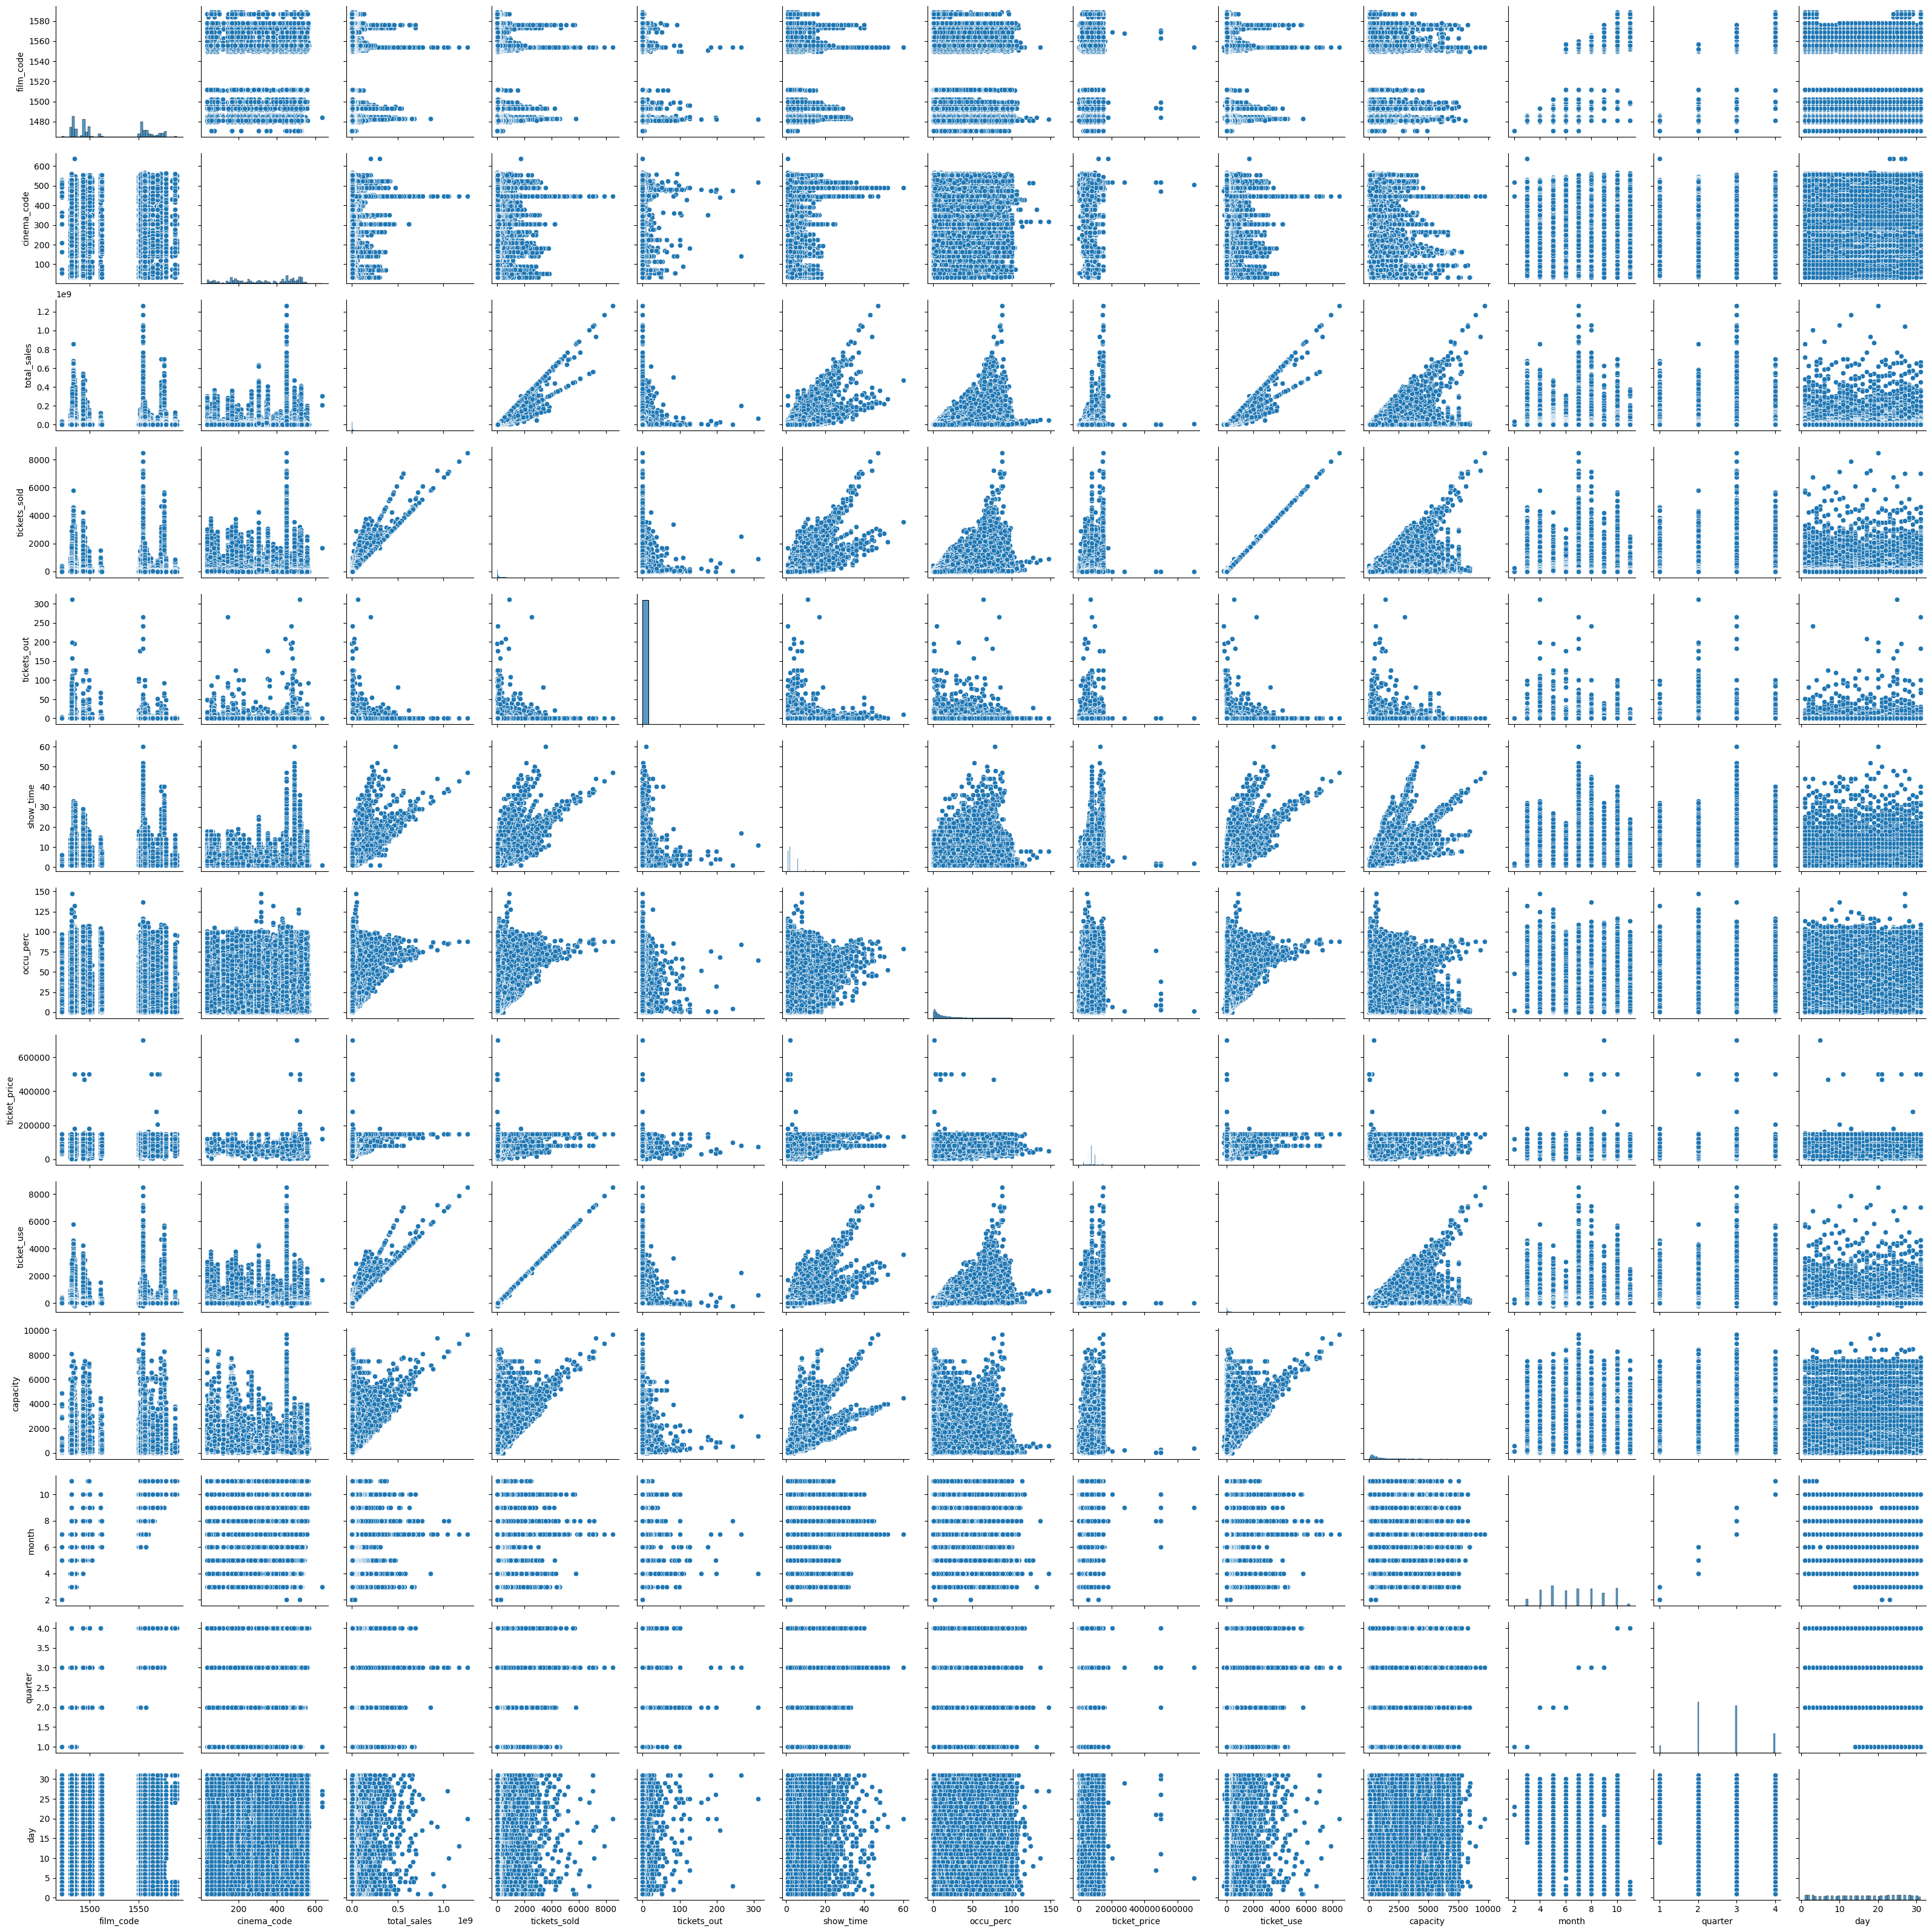

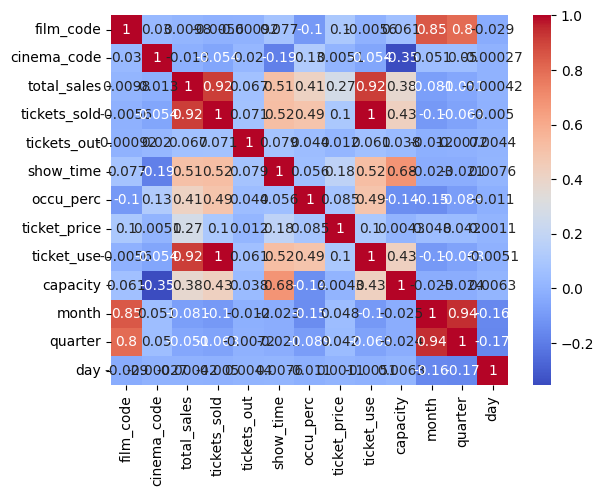

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'df' is your DataFrame
# Convert date columns to datetime objects if applicable
df['date'] = pd.to_datetime(df['date'])

# Drop non-numeric columns before calculating correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Summary statistics
print(numeric_df.describe())

# Visualize distribution of numerical features
sns.pairplot(numeric_df)
plt.show()

# Visualize correlation matrix
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [54]:
# Feature engineering example
# Extracting month and quarter from date column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# Drop unnecessary columns
df = df.drop(['film_code', 'cinema_code', 'date'], axis=1)

# Check the updated DataFrame
print(df.head())


   total_sales  tickets_sold  tickets_out  show_time  occu_perc  ticket_price  \
0      3900000            26            0          4       4.26      150000.0   
1      3360000            42            0          5       8.08       80000.0   
2      2560000            32            0          4      20.00       80000.0   
3      1200000            12            0          1      11.01      100000.0   
4      1200000            15            0          3      16.67       80000.0   

   ticket_use    capacity  month  quarter  day  
0          26  610.328638      5        2    5  
1          42  519.801980      5        2    5  
2          32  160.000000      5        2    5  
3          12  108.991826      5        2    5  
4          15   89.982004      5        2    5  


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('tickets_sold', axis=1)
y = df['tickets_sold']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# XGBRegressor model

In [59]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on training set
train_preds = model.predict(X_train)

# Predictions on test set
test_preds = model.predict(X_test)

# Calculate RMSE and MAE
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


print("Train MAE:", train_mae)
print("Test MAE:", test_mae)


Train RMSE: 3.6072825121134584
Test RMSE: 10.626243932571136
Train MAE: 1.2850223034148494
Test MAE: 1.9397172537253125


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   1.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_e

In [62]:
#Fine tune the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_e

In [41]:
from sklearn.model_selection import cross_val_score, KFold

# Define the model (e.g., XGBoost)
model = XGBRegressor()

# Define number of folds for cross-validation
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert the scores to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Cross-validation RMSE scores:", cv_scores)
print("Mean RMSE:", mean_cv_score)
print("Standard deviation of RMSE:", std_cv_score)


Cross-validation RMSE scores: [131.31813516 195.88592231 131.9638773   94.39578769 120.08192805]
Mean RMSE: 134.72913009999826
Standard deviation of RMSE: 33.46865333752476


In [64]:
# Define a threshold for correct predictions
threshold = 0.1  # For example, consider predictions within 10% of the true value as correct

# Calculate the percentage of correct predictions
correct_predictions = ((y_pred >= (1 - threshold) * y_test) & (y_pred <= (1 + threshold) * y_test)).mean()
accuracy_percentage = correct_predictions * 100

print("Accuracy of the model (within 10% threshold): {:.2f}%".format(accuracy_percentage))


Accuracy of the model (within 10% threshold): 99.46%


In [ ]:
#LSTM model